In [26]:
from keras import models,layers,optimizers,losses,metrics

In [27]:
from keras.datasets import reuters

## 数据集

In [28]:
(train_data,train_labels),(test_data,test_labels)=reuters.load_data(num_words=10000)

In [29]:
len(train_data)

8982

In [30]:
len(test_data)

2246

In [31]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [32]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value,key) for (key,value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i-3,'?') for i in train_data[0]])

In [33]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [34]:
train_labels[10]

3

## 数据预处理

In [35]:
import numpy as np

In [36]:
def vectorize_sequences(sequences,dimension=10000):
    results = np.zeros((len(sequences),dimension))
    for i,sequence in enumerate(sequences):
        results[i,sequence] = 1.
    return results

In [37]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [40]:
import keras
one_hot_train_labels = keras.utils.np_utils.to_categorical(train_labels)
one_hot_test_labels = keras.utils.np_utils.to_categorical(test_labels)

## 建设自己的 NN

In [41]:
model = models.Sequential()

In [42]:
model.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))

In [43]:
model.compile(loss=losses.categorical_crossentropy,
             optimizer=optimizers.RMSprop(lr=0.001),
             metrics=[metrics.binary_accuracy])

## 验证集

In [44]:
history = model.fit(x_train,one_hot_train_labels,epochs=20,batch_size=512,validation_split=0.1)

Train on 8083 samples, validate on 899 samples
Epoch 1/20
8083/8083 [==============================] - 3s 344us/step - loss: 2.6551 - binary_accuracy: 0.9798 - val_loss: 1.8710 - val_binary_accuracy: 0.9839
Epoch 2/20
8083/8083 [==============================] - 2s 197us/step - loss: 1.4540 - binary_accuracy: 0.9874 - val_loss: 1.4107 - val_binary_accuracy: 0.9885
Epoch 3/20
8083/8083 [==============================] - 1s 175us/step - loss: 1.0524 - binary_accuracy: 0.9909 - val_loss: 1.2594 - val_binary_accuracy: 0.9894
Epoch 4/20
8083/8083 [==============================] - 1s 151us/step - loss: 0.8188 - binary_accuracy: 0.9924 - val_loss: 1.1219 - val_binary_accuracy: 0.9900
Epoch 5/20
8083/8083 [==============================] - 1s 154us/step - loss: 0.6405 - binary_accuracy: 0.9938 - val_loss: 1.0460 - val_binary_accuracy: 0.9904
Epoch 6/20
8083/8083 [==============================] - 1s 150us/step - loss: 0.5080 - binary_accuracy: 0.9948 - val_loss: 1.0211 - val_binary_accuracy: 

### 画出来看看

In [45]:
import matplotlib.pyplot as plt

In [46]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,21)

acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']

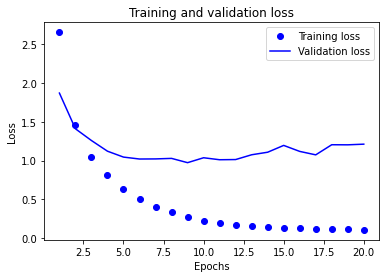

In [47]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

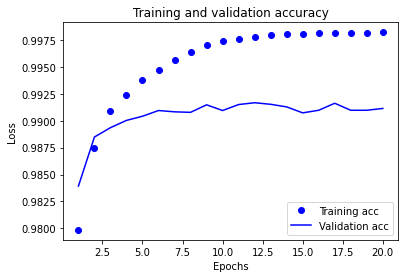

In [48]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

- 应该是在第 8epoch 处过拟合

- 所以将训练 epoch 改为 8 较为合适

In [49]:
model = models.Sequential()

In [50]:
model.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))

In [51]:
model.compile(loss=losses.categorical_crossentropy,
             optimizer=optimizers.RMSprop(lr=0.001),
             metrics=[metrics.binary_accuracy])

In [52]:
model.fit(x_train,one_hot_train_labels,epochs=8,validation_split=0.1)

Train on 8083 samples, validate on 899 samples
Epoch 1/8
8083/8083 [==============================] - 4s 488us/step - loss: 1.4300 - binary_accuracy: 0.9886 - val_loss: 1.1463 - val_binary_accuracy: 0.9904
Epoch 2/8
8083/8083 [==============================] - 3s 389us/step - loss: 0.7537 - binary_accuracy: 0.9933 - val_loss: 1.0058 - val_binary_accuracy: 0.9911
Epoch 3/8
8083/8083 [==============================] - 3s 357us/step - loss: 0.4793 - binary_accuracy: 0.9954 - val_loss: 1.1071 - val_binary_accuracy: 0.9916
Epoch 4/8
8083/8083 [==============================] - 3s 361us/step - loss: 0.3306 - binary_accuracy: 0.9967 - val_loss: 1.0853 - val_binary_accuracy: 0.9913
Epoch 5/8
8083/8083 [==============================] - 3s 360us/step - loss: 0.2605 - binary_accuracy: 0.9974 - val_loss: 1.2130 - val_binary_accuracy: 0.9915
Epoch 6/8
8083/8083 [==============================] - 3s 357us/step - loss: 0.2129 - binary_accuracy: 0.9978 - val_loss: 1.3110 - val_binary_accuracy: 0.9910

In [53]:
results = model.evaluate(x_test,one_hot_test_labels)

2246/2246 [==============================] - 1s 267us/step


In [54]:
results

[1.3562926473303343, 0.9914824962615967]

## 试试效果

In [55]:
predictions = model.predict(x_test)

In [56]:
predictions[0]

array([8.1202103e-08, 6.8408019e-07, 1.8912794e-13, 4.3848515e-01,
       5.5687249e-01, 1.7560653e-15, 9.8723507e-10, 4.0207673e-09,
       5.3981389e-04, 3.3162127e-08, 1.5649995e-07, 1.2583407e-06,
       6.1973533e-09, 4.7989841e-05, 8.8579023e-12, 7.7041030e-12,
       2.2542677e-05, 7.5298240e-10, 1.8745063e-11, 2.8433215e-03,
       1.1783325e-03, 1.5534960e-07, 1.7088641e-12, 4.9097043e-06,
       2.5029875e-13, 5.3281575e-08, 6.4872578e-12, 1.9864740e-11,
       4.8435964e-11, 7.1473383e-10, 2.6264930e-09, 3.1587301e-13,
       8.5170475e-09, 3.8728579e-14, 2.3887264e-10, 8.8730533e-12,
       3.0360059e-06, 4.5214290e-09, 4.4931125e-12, 1.3253344e-09,
       3.1398513e-09, 1.7541441e-11, 9.9653501e-11, 1.8789323e-13,
       2.1255865e-10, 9.1649216e-11], dtype=float32)